<h1>ANN for Clustering Customer Segments</h1>
<h2>DA221, Introduction to AI : Course Project</h2>
<h3>The Upside Down</h3>
<h4>M. Abhiram , 230150015 <br><br>
K. Ashmita , 230150014 <br><br>
B. Cherish , 230150007 <br></h4>

<h1>Importing the Libraries</h1>

In [1]:
import pandas as pd        # pandas for loading the dataframe            
import numpy as np         # numpy for handling numerical data          

import matplotlib.pyplot as plt      # matplotlib for data visualization
import seaborn as sns                # seaborn for more appealing plots

import sklearn                                         # For preprocessing
from sklearn.preprocessing import StandardScaler       # For standardizion of the dataset

<h1>Loading the Dataset</h1>

In [2]:
df=pd.read_csv("Mall_Customers.csv")        

In [3]:
df       

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<h1>Data Preprocessing</h1>

In [4]:
df=df.drop('CustomerID',axis=1)              # Dropping the CustomerID column since for every row, row index equals the CustomerID
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h3>There are no null values present in the dataset<h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<h3>Since 'Gender' is a categorical feature, we could use one hot coding to convert it into a numerical column</h3>

<h1>Exploratory Data Analysis</h1>

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


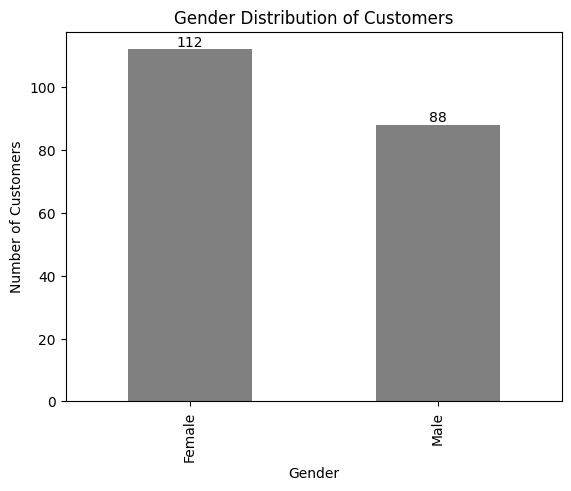

In [8]:
gender_counts=df["Gender"].value_counts()
gender_counts.plot(kind="bar", color="grey")
plt.title("Gender Distribution of Customers")
plt.ylabel("Number of Customers")
plt.xlabel("Gender")
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 1, f"{v}", ha='center')
plt.show()

Text(0.5, 1.0, 'Customers Average Age')

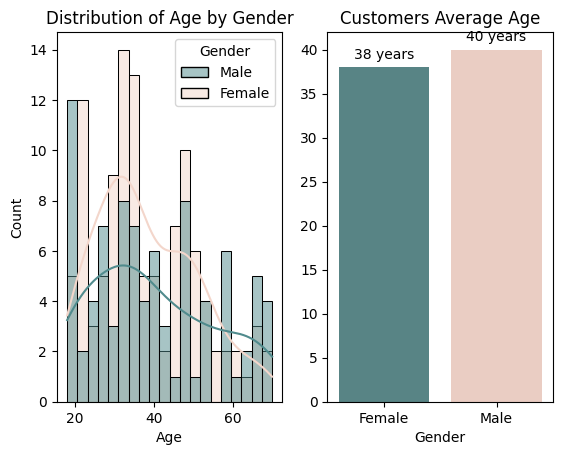

In [9]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Age', hue='Gender', kde=True,
             palette=['#508B8D', '#F3D6CB'], bins=20)
plt.title("Distribution of Age by Gender")

plt.subplot(1,2,2)
avg_age = df.groupby('Gender')['Age'].mean().round(0).astype(int)
sns.barplot(x=avg_age.index, y=avg_age.values,hue=avg_age.index, palette=['#508B8D', '#F0CABD'])
for i, v in enumerate(avg_age.values):
    plt.text(i, v + 1, f"{v} years", ha='center')
plt.title("Customers Average Age")


Text(0.5, 1.0, 'Customers Average Income')

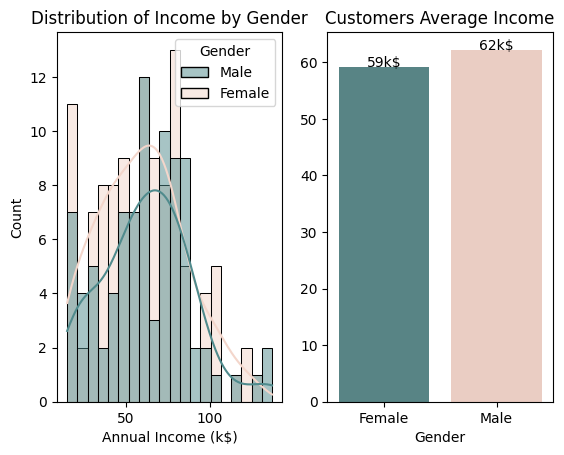

In [10]:
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df.columns[2], hue='Gender', kde=True,
             palette=['#508B8D', '#F3D6CB'], bins=20)
plt.title("Distribution of Income by Gender")

plt.subplot(1, 2, 2)
avg_income = df.groupby('Gender')["Annual Income (k$)"].mean()
sns.barplot(x=avg_income.index, y=avg_income.values,hue=avg_income.index, palette=['#508B8D', '#F0CABD'])
for i, v in enumerate(avg_income.values):
    plt.text(i, v , f"{v:,.0f}k$", ha='center')
plt.title("Customers Average Income")

Text(0.5, 1.0, 'Average Spending')

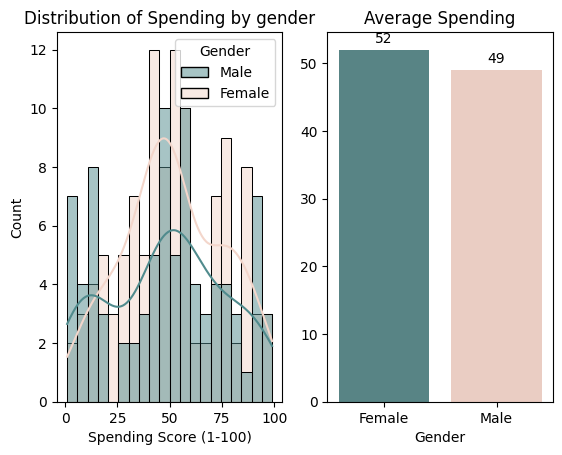

In [11]:
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', kde=True,
             palette=['#508B8D', '#F3D6CB'], bins=20)
plt.title("Distribution of Spending by gender")

plt.subplot(1, 2, 2)
avg_spending = df.groupby('Gender')['Spending Score (1-100)'].mean().round(0).astype(int)
sns.barplot(x=avg_spending.index, y=avg_spending.values,hue=avg_spending.index, palette=['#508B8D', '#F0CABD'])
for i, v in enumerate(avg_spending.values):
    plt.text(i, v + 1, f"{v}", ha='center')
plt.title("Average Spending")

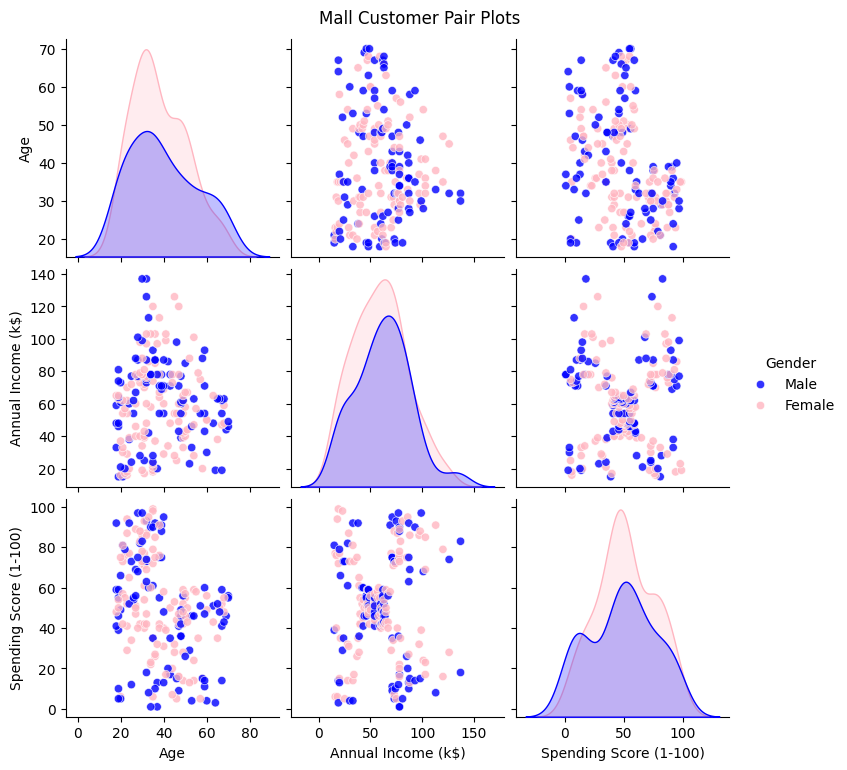

In [12]:
sns.pairplot(df, hue='Gender', palette=['blue', 'lightpink'],
             diag_kind='kde', plot_kws={'alpha': 0.8, 'edgecolor': 'white'})
plt.suptitle("Mall Customer Pair Plots", y=1.02)
plt.show()

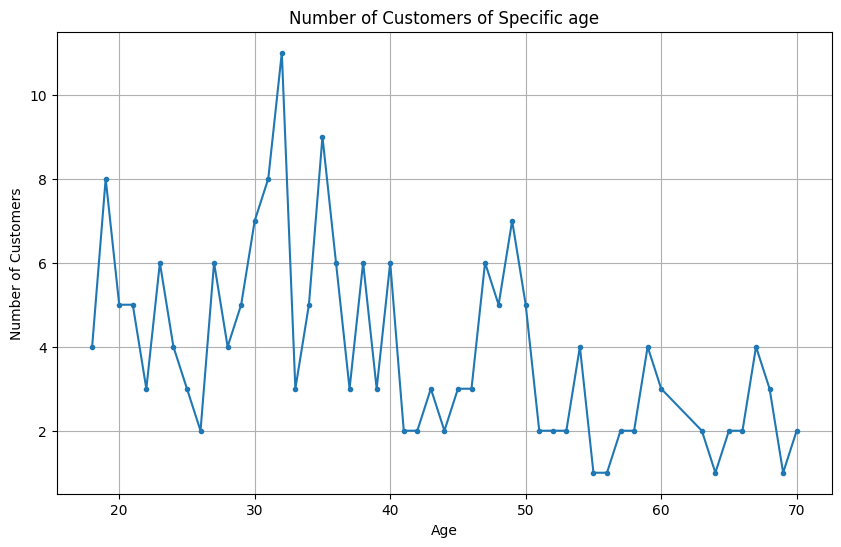

In [13]:
age_counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, marker='.', linestyle='-')
plt.title('Number of Customers of Specific age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()

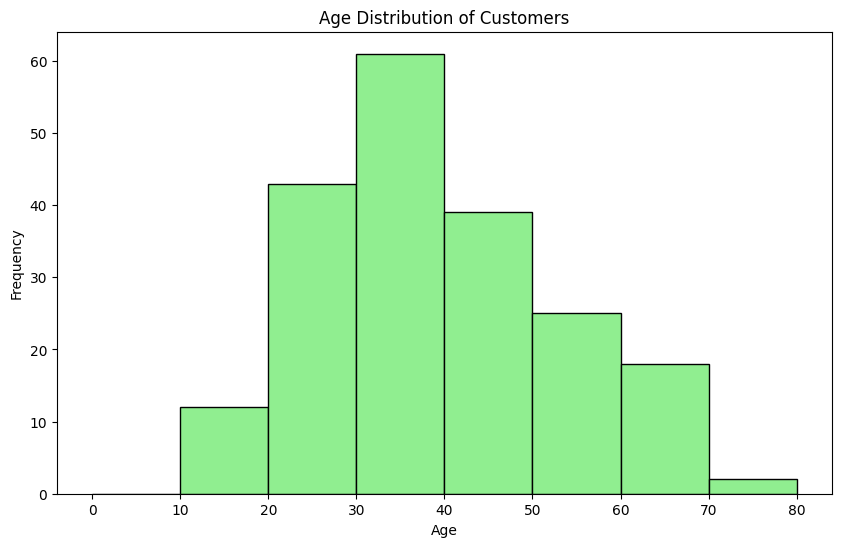

In [14]:
bin_edges = range(0, df['Age'].max() + 11, 10)

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=bin_edges, color='lightgreen', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, df['Age'].max() + 11, 10))
plt.show()

In [15]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

<Axes: >

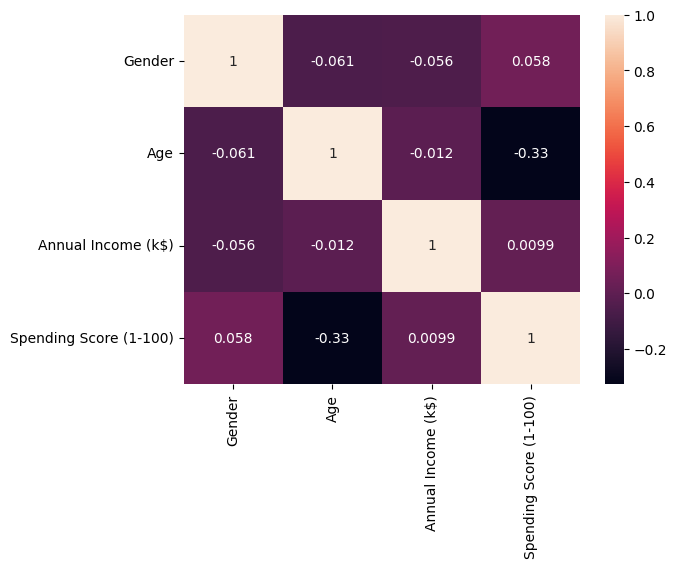

In [16]:
sns.heatmap(df.corr(), annot=True)

<h3>Summary of EDA</h3>
<h5>
Overall, the Distributions are fairly proportional between Men and Women. On an average, men are slightly older than women and tend to have higher incomes, while women tend to spend more than men. Based on the correlations and scatterplots, the variables in the dataset do not have very strong relationships with each other. There is a weak negative association between Age and Spending Score of -0.33 which suggests that as Age increases Spending Score decreases which can also be observed in the scatterplot.
A dense cluster in this scatter plot between Annual Income and Spending score suggests that A significant portion of customers fall within a specific range of both Annual Income and Spending Score.</h5>

<h1>Importing the required Libraries for ANN</h1>

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For standardizing the dataset
from sklearn.model_selection import train_test_split

import random        # For random initialization of cluster centers

# Setting a seed 
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(20)

# Setting up Determinism
torch.use_deterministic_algorithms(True)
# Stricter Determinism
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

<h1>Standardization</h1>

In [18]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(df[features])

# Concatenate Gender (without scaling) and Scaled Continuous Features
X_scaled = np.column_stack((df['Gender'].values, X_continuous_scaled))

# Convert to PyTorch Tensor
X = torch.tensor(X_scaled, dtype=torch.float32)

<h1>Designing an Autoencoder</h1>

In [19]:
class AutoEncoder1(nn.Module):                      # 4 -> 2 -> 4
  def __init__(self):
    super(AutoEncoder1,self).__init__()
    self.fc1 = nn.Linear(4,2)
    self.act1 = nn.Tanh()
    self.fc2 = nn.Linear(2,4)

  def forward(self,x):
    x = self.fc1(x)
    x = self.act1(x)
    Latent_Space = x
    x = self.fc2(x)
    return x, Latent_Space

class AutoEncoder2(nn.Module):                   # 4 -> 3 -> 2 -> 3 -> 4
  def __init__(self):
    super(AutoEncoder2,self).__init__()
    self.fc1 = nn.Linear(4,3)
    self.act1 = nn.Tanh()
    self.fc2 = nn.Linear(3,2)
    self.act2 = nn.Tanh()
    self.fc3 = nn.Linear(2,3)
    self.act3 = nn.Tanh()
    self.fc4 = nn.Linear(3,4)

  def forward(self,x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    Latent_Space = x
    x = self.fc3(x)
    x = self.act3(x)
    x = self.fc4(x)
    return x, Latent_Space

class AutoEncoder3(nn.Module):                   # 4 -> 4 -> 3 -> 3 -> 2 -> 3 -> 3 -> 4 -> 4
  def __init__(self):
    super(AutoEncoder3,self).__init__()
    self.fc1 = nn.Linear(4,4)
    self.act1 = nn.Tanh()
    self.fc2 = nn.Linear(4,3)
    self.act2 = nn.Tanh()
    self.fc3 = nn.Linear(3,3)
    self.act3 = nn.Tanh()
    self.fc4 = nn.Linear(3,2)
    self.act4 = nn.Tanh()
    self.fc5 = nn.Linear(2,3)
    self.act5 = nn.Tanh()
    self.fc6 = nn.Linear(3,3)
    self.act6 = nn.Tanh()
    self.fc7 = nn.Linear(3,4)
    self.act7 = nn.Tanh()
    self.fc8 = nn.Linear(4,4)

  def forward(self,x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    x = self.act3(x)
    x = self.fc4(x)
    Latent_Space = x
    x = self.act4(x)
    x = self.fc5(x)
    x = self.act5(x)
    x = self.fc6(x)
    x = self.act6(x)
    x = self.fc7(x)
    x = self.act7(x)
    x = self.fc8(x)
    return x, Latent_Space

<h1>Training the Autoencoder and Visualizing the Latent Spaces</h1>


Training Network 1
Epoch [0/5000], Loss: 1.1404
Epoch [500/5000], Loss: 0.5546
Epoch [1000/5000], Loss: 0.3854
Epoch [1500/5000], Loss: 0.3107
Epoch [2000/5000], Loss: 0.2714
Epoch [2500/5000], Loss: 0.2528
Epoch [3000/5000], Loss: 0.2435
Epoch [3500/5000], Loss: 0.2387
Epoch [4000/5000], Loss: 0.2361
Epoch [4500/5000], Loss: 0.2345


/var/folders/qy/q93800rd62b3y42kqdkpbkqw0000gn/T/ipykernel_8895/706263345.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Latent_Space[:, 0], Latent_Space[:, 1], cmap='viridis', alpha=0.6)


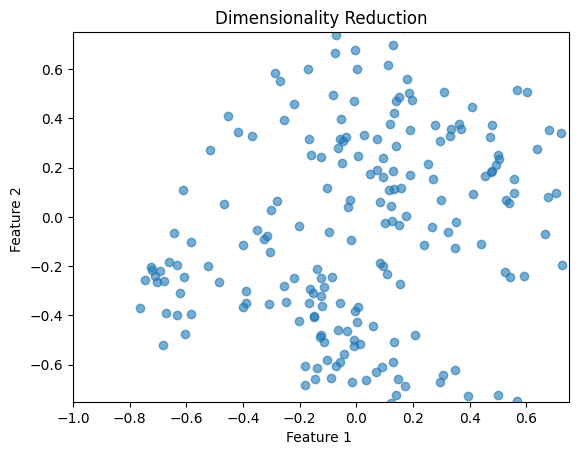


Training Network 2
Epoch [0/5000], Loss: 1.0337
Epoch [500/5000], Loss: 0.3642
Epoch [1000/5000], Loss: 0.2829
Epoch [1500/5000], Loss: 0.2506
Epoch [2000/5000], Loss: 0.2366
Epoch [2500/5000], Loss: 0.2323
Epoch [3000/5000], Loss: 0.2303
Epoch [3500/5000], Loss: 0.2287
Epoch [4000/5000], Loss: 0.2266
Epoch [4500/5000], Loss: 0.2235


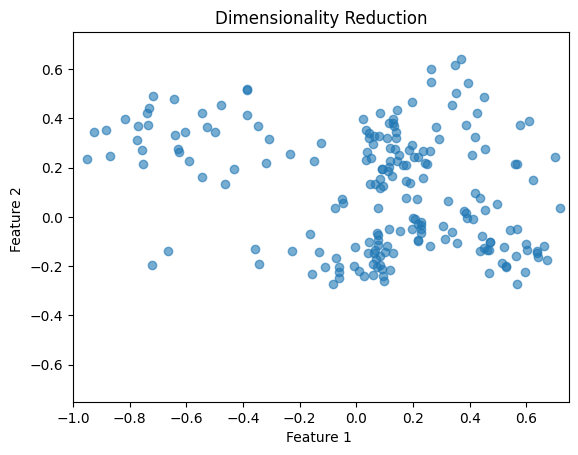


Training Network 3
Epoch [0/5000], Loss: 0.8901
Epoch [500/5000], Loss: 0.4828
Epoch [1000/5000], Loss: 0.3291
Epoch [1500/5000], Loss: 0.2025
Epoch [2000/5000], Loss: 0.1489
Epoch [2500/5000], Loss: 0.1404
Epoch [3000/5000], Loss: 0.1350
Epoch [3500/5000], Loss: 0.1302
Epoch [4000/5000], Loss: 0.1259
Epoch [4500/5000], Loss: 0.1226


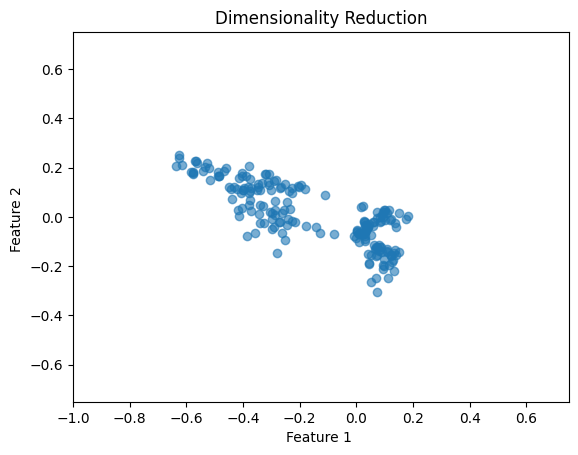

In [20]:
# Training all the Autoencoders

# Train Function
def train_encoder(model, X, num_epochs=5000):
    Loss_Function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(num_epochs):
        model.train()
        Reconstructed_X, Latent_Space = model(X)
        loss = Loss_Function(Reconstructed_X,X)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

# Visualizing the Latent Space Function
def visualize(model, Latent_Space):
    plt.scatter(Latent_Space[:, 0], Latent_Space[:, 1], cmap='viridis', alpha=0.6)
    plt.title("Dimensionality Reduction")
    plt.xlabel("Feature 1 ")
    plt.ylabel("Feature 2 ")
    plt.xlim(-1,0.75)
    plt.ylim(-0.75,0.75)
    plt.show()

# Training the Model
models = [AutoEncoder1(),AutoEncoder2(),AutoEncoder3()]
Latent_Space_List = []
for i ,model in enumerate(models):
  print(f"\nTraining Network {i+1}")
  train_encoder(model, X, num_epochs=5000)
  with torch.no_grad():
    Reconstructed_X, Latent_Space = model(X)
    Latent_Space_List.append(Latent_Space)
    visualize(model, Latent_Space_List[i])


<h3>The 2nd architecture looks the best since there is neither any underfitting nor any overfitting of the dataset. The 1st architecture looks like it underfit the data and the 3rd architecture has probably overfit the data</h3>
<h3>Extracting the Latent Space, encoded by the Autoencoder</h3>

In [21]:
Latent_Space = Latent_Space_List[1]
N_clusters = 7                             # A Rough estimate of the maxiumum no. of clusters

<h1>Designing an ANN for Clustering</h1>

In [22]:
# Define the four network architectures
class Network1(nn.Module):
  def __init__(self):
    super(Network1, self).__init__()
    self.fc1 = nn.Linear(2, 5)
    self.act1 = nn.Tanh()                  #2-5-N   
    self.fc2 = nn.Linear(5, N_clusters)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

class Network2(nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.act1 = nn.Tanh()                       #2-10-N   
        self.fc2 = nn.Linear(10, N_clusters)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

class Network3(nn.Module):
    def __init__(self):
        super(Network3, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.act1 = nn.Tanh()                     #2-10-10-N  Best
        self.fc2 = nn.Linear(10, 10)
        self.act2 = nn.Tanh()
        self.fc3 = nn.Linear(10, N_clusters)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

class Network4(nn.Module):
    def __init__(self):
        super(Network4, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.act1 = nn.Tanh()                    #2-8-32-256-N
        self.fc2 = nn.Linear(8, 32)
        self.act2 = nn.Tanh()
        self.fc3 = nn.Linear(32, 256)
        self.act3 = nn.Tanh()
        self.fc4 = nn.Linear(256, N_clusters)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x

<h1>Defining the MMJ-K-Means Loss Function</h1>

In [23]:
# MMJ-K-means Loss Function
class MMJ_KMeans_Loss(nn.Module):

    def __init__(self):
        super(MMJ_KMeans_Loss, self).__init__()

    def forward(self,inputs,output):

      no_data_points = inputs.size(0)
      no_features = inputs.size(1)
      no_clusters = output.size(1)

      Hard_Cluster_Index = torch.zeros(no_data_points, dtype = torch.long, device=inputs.device) # Initialize all points to cluster 0
      Mean_Clusters = torch.rand(no_clusters,no_features, device=inputs.device)                  # Initialize all centroids randomly
      Count_Clusters = torch.zeros(no_clusters, dtype=torch.long, device=inputs.device)          # No of points in each cluster

      # Finding the cluster centroids
      for i in range(no_data_points):
        Hard_Cluster_Index[i] = torch.argmax(output[i])
        Cluster_Index = Hard_Cluster_Index[i].item()
        Mean_Clusters[Cluster_Index] += inputs[i]
        Count_Clusters[Cluster_Index] += 1

      for i in range(no_clusters):
        if(Count_Clusters[i]>0):
          Mean_Clusters[i] /= Count_Clusters[i]

      # Calculating the Loss Function

      Loss = torch.tensor(0.0, requires_grad=True, device=inputs.device)

      for i in range(no_data_points):
        Cluster_Index = Hard_Cluster_Index[i].item()
        Euclidean_Dist = torch.norm(inputs[i]-Mean_Clusters[Cluster_Index], p=2).square()
        Cluster_Prob = output[i][Cluster_Index]
        Loss = Loss+ Cluster_Prob * Euclidean_Dist

      Loss = Loss/ no_data_points

      return Loss

<h1>Defining the Silhouette Score of the formed clusters</h1>

In [24]:
from sklearn.metrics.pairwise import pairwise_distances  # For precomputing the pairwaise distance matrix

#Function to calculate Average Silhouette Score
def Average_Silhouette_Score(X,labels):
    no_of_samples=len(labels)
    unique_labels = np.unique(labels)
    no_of_clusters=len(unique_labels)

    dist_matrix = pairwise_distances(X, metric='euclidean') #Calculates pairwise distances of each sample and stores as a matrix of dim (no_of_samples x no_of_samples)

    a=np.zeros(no_of_samples)
    b=np.zeros(no_of_samples)

    for i in range(no_of_samples):
        cluster = labels[i]
        same_cluster= labels == cluster         # Returns a bitmask, where 1 represents it is present in the cluster and 0 represents it is not present in the cluster
        same_cluster[i]=False                   # exclude self
        if np.sum(same_cluster) > 0:
            a[i] = np.mean(dist_matrix[i, same_cluster])
        else:
            a[i] = 0  # if cluster has only one point

        other_clusters=[]
        for l in unique_labels:
            if(l!=cluster):
                other_clusters.append(l)

        # Finding pairwise distances with respect to each and every cluster
        b_values=[]
        for cluster in other_clusters:
            points_in_cluster = labels == cluster
            if np.sum(points_in_cluster)>0:
                b_values.append(np.mean(dist_matrix[i,points_in_cluster]))

        if len(b_values) > 0:
            b[i] = min(b_values)
        else:
            b[i] = 0  # if only one cluster exists

    #Calculating Silhouette scores for each sample
    s = np.zeros(no_of_samples)
    for i in range(no_of_samples):
        if a[i] == 0 and b[i] == 0:
            s[i] = 0
        else:
            s[i] = (b[i] - a[i]) / max(a[i], b[i])

    return np.mean(s)

<h1>Training the Neural Network and Plotting the Clusters</h1>

/var/folders/qy/q93800rd62b3y42kqdkpbkqw0000gn/T/ipykernel_8895/446134449.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('viridis',N_clusters)          # For having the same colour palette in combined visualization and when indiviually visualizing the clusters



Training Network 1
Epoch [0/500], Loss: 0.0396
Epoch [100/500], Loss: 0.0306
Epoch [200/500], Loss: 0.0263
Epoch [300/500], Loss: 0.0172
Epoch [400/500], Loss: 0.0101
0.4553093963456547


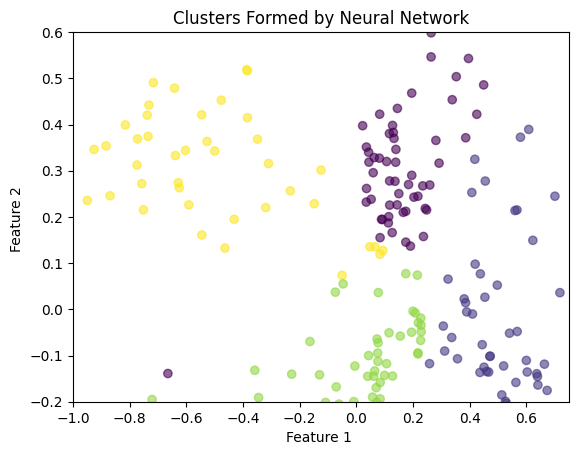


Training Network 2
Epoch [0/500], Loss: 0.0378
Epoch [100/500], Loss: 0.0227
Epoch [200/500], Loss: 0.0129
Epoch [300/500], Loss: 0.0140
Epoch [400/500], Loss: 0.0096
0.24483582976513052


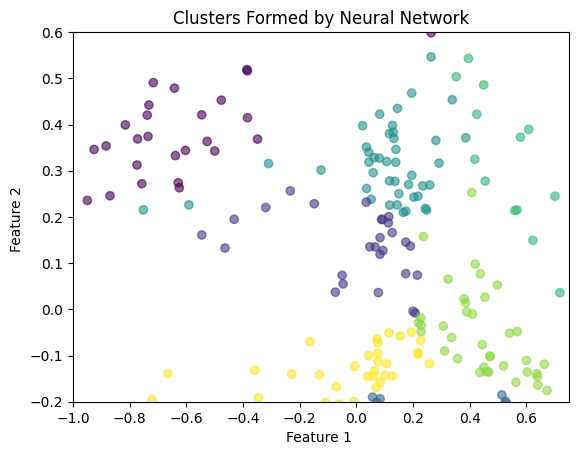


Training Network 3
Epoch [0/500], Loss: 0.0333
Epoch [100/500], Loss: 0.0057
Epoch [200/500], Loss: 0.0049
Epoch [300/500], Loss: 0.0047
Epoch [400/500], Loss: 0.0067
0.24051678946726643


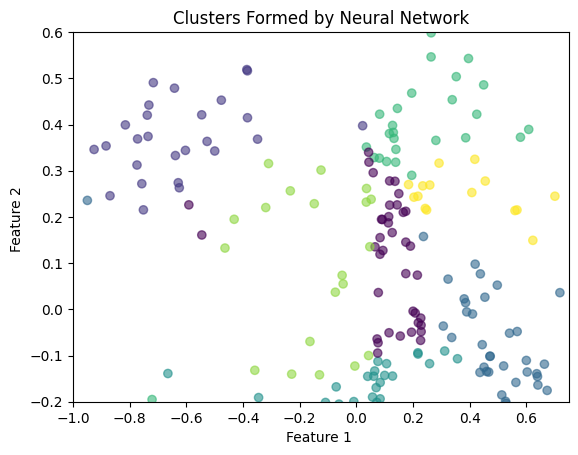


Training Network 4
Epoch [0/500], Loss: 0.0207
Epoch [100/500], Loss: 0.0143
Epoch [200/500], Loss: 0.0184
Epoch [300/500], Loss: 0.0190
Epoch [400/500], Loss: 0.0134
0.08961311276197219


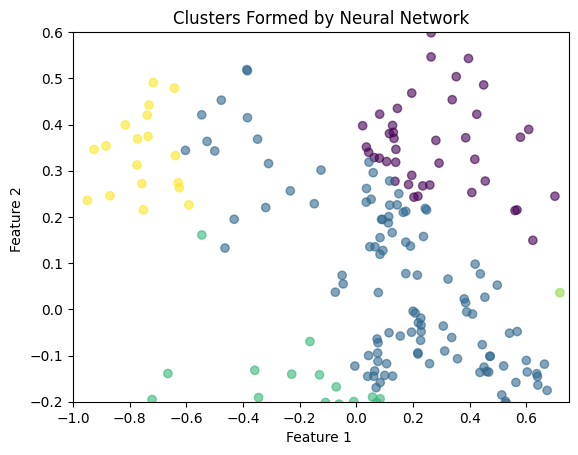

In [25]:
import matplotlib.cm as cm
     
color_map = cm.get_cmap('viridis',N_clusters)          # For having the same colour palette in combined visualization and when indiviually visualizing the clusters

Cluster_Labels = []                                    # Final Clustering

# Train Function
def train_network(model, X, num_epochs=250):
    criterion = MMJ_KMeans_Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.00025)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(X, outputs)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

# Visualize Clusters Function
def cluster_and_visualize(model,Latent_Spaces):
    with torch.no_grad():
        outputs = model(Latent_Spaces)
        cluster_labels = torch.argmax(outputs, dim=1).numpy()
        Cluster_Labels.append(cluster_labels)
        print(Average_Silhouette_Score(Latent_Spaces,cluster_labels))

    plt.scatter(Latent_Spaces[:, 0], Latent_Spaces[:, 1],cmap=color_map, c=cluster_labels, alpha=0.6)
    plt.title("Clusters Formed by Neural Network")
    plt.xlabel("Feature 1 ")
    plt.ylabel("Feature 2 ")
    plt.xlim(-1,0.75)
    plt.ylim(-0.2,0.6)
    plt.show()

# Train and Visualize for Each Model
models = [Network1(), Network2(), Network3(), Network4()]
for i, model in enumerate(models):
    print(f"\nTraining Network {i+1}")
    train_network(model, Latent_Space, num_epochs=500)
    cluster_and_visualize(model, Latent_Space)

<h3>The 1st architecture looks the best since it achieved the highest Silhouette Score of 0.46</h3>

<h1>Analyzing the Clusters</h1>

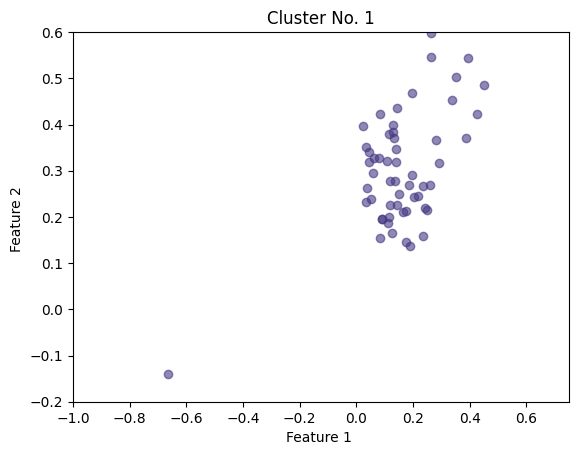

Analysis of the above cluster : 
Dominant Gender : Male
Mean Age : 54.98, with Variance : 85.45
Mean Income : 49.35, with Variance : 268.09
Mean Purchasing Score : 42.14, with Variance : 256.77
Customers Present in this cluster : [  8  10  12  18  22  24  30  32  34  36  40  42  44  46  50  53  54  55
  56  57  59  60  62  63  64  66  67  70  71  72  73  74  76  77  79  80
  82  83  85  86  89  90  92  93  96  98 101 102 104 106 107 108 109 110
 116 118 197]


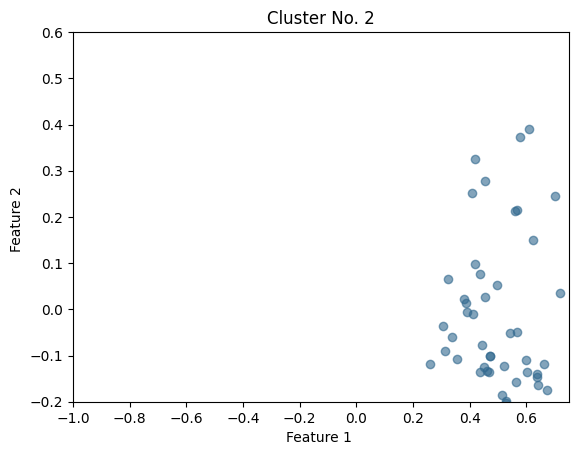

Analysis of the above cluster : 
Dominant Gender : Male
Mean Age : 27.02, with Variance : 44.79
Mean Income : 32.35, with Variance : 171.64
Mean Purchasing Score : 59.54, with Variance : 527.02
Customers Present in this cluster : [  0   1   2   3   4   5   6   7   9  11  13  14  15  16  17  19  20  21
  23  25  26  27  28  29  31  33  35  37  38  39  41  43  45  47  48  49
  51  52  58  61  65  68  69  75  78  84  87 111]


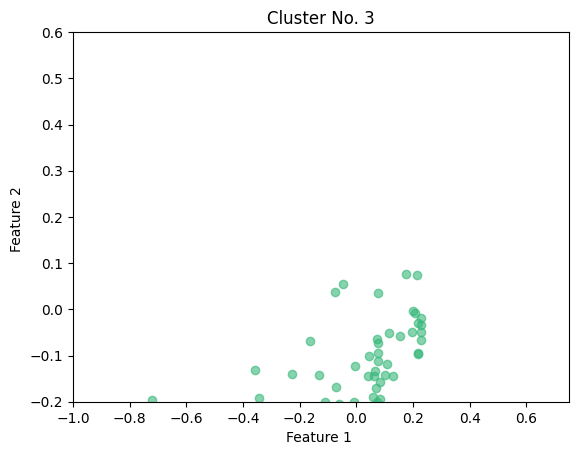

Analysis of the above cluster : 
Dominant Gender : Male
Mean Age : 30.58, with Variance : 33.91
Mean Income : 78.64, with Variance : 273.53
Mean Purchasing Score : 71.78, with Variance : 330.36
Customers Present in this cluster : [ 81  88  91  94  95  97  99 100 103 105 113 114 115 120 122 123 125 127
 129 131 132 133 135 137 139 141 142 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 199]


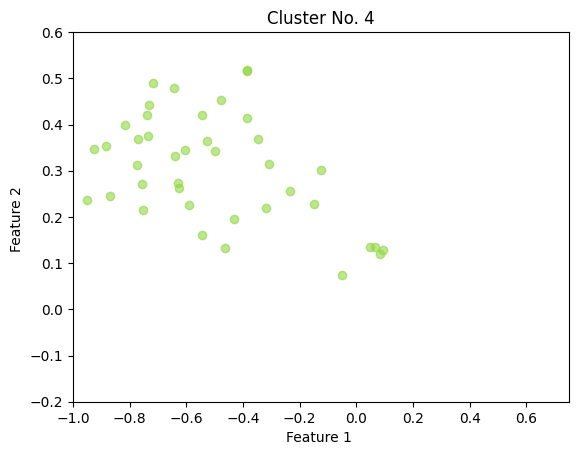

Analysis of the above cluster : 
Dominant Gender : Female
Mean Age : 41.42, with Variance : 116.25
Mean Income : 85.52, with Variance : 286.56
Mean Purchasing Score : 20.8, with Variance : 195.7
Customers Present in this cluster : [112 117 119 121 124 126 128 130 134 136 138 140 144 146 148 150 152 154
 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190
 192 194 196 198]


In [26]:
#Function to analyze clusters

def Cluster_Analysis(X,Latent_Spaces,labels):
    unique_labels = np.unique(labels)

    # Iterating over all the clusters
    for idx,cluster in enumerate(unique_labels) :
        same_cluster = labels == cluster  # Bitmask
        Mean=X[same_cluster].mean(axis=0)
        Variance=X[same_cluster].var(axis=0)

        plt.scatter(Latent_Spaces[same_cluster, 0], Latent_Spaces[same_cluster, 1],color=color_map(cluster),alpha=0.6)
        plt.title(f"Cluster No. {idx+1}")
        plt.xlabel("Feature 1 ")
        plt.ylabel("Feature 2 ")
        plt.xlim(-1,0.75)
        plt.ylim(-0.2,0.6)
        plt.show()
        print(f"Analysis of the above cluster : ")
        if(Mean["Gender"]>0.5):
          print("Dominant Gender : Male")
        else:
          print("Dominant Gender : Female")
        print(f"Mean Age : {round(Mean['Age'],2)}, with Variance : {round(Variance['Age'],2)}")
        print(f"Mean Income : {round(Mean['Annual Income (k$)'],2)}, with Variance : {round(Variance['Annual Income (k$)'],2)}")
        print(f"Mean Purchasing Score : {round(Mean['Spending Score (1-100)'],2)}, with Variance : {round(Variance['Spending Score (1-100)'],2)}")
        print(f"Customers Present in this cluster : {np.where(same_cluster)[0]}")

Cluster_Analysis(df,Latent_Space,Cluster_Labels[0])

<h1>Interpreting the Clusters</h1>
<h4>
1. Cluster No. 1 mostly consists of older men who make decent amount of money, with a decent spending score as well. Marketing more vintage and antique products could well be beneficial in this cluster.<br><br>
2. Cluster No. 2 mostly consists of younger men who earn a bit less but still are willing to purchase products from the mall. This cluster could be well maximized by marketing products with the highest value to price ratio, because it looks like the customers are willing to spend, but are constrained due to their income.<br><br>
3. Cluster No. 3 is the most important cluster which consists of younger men with a very high income and also the highest spending score. Marketing trendy and fashionable products could be the way to go in this cluster.<br><br>
4. Cluster No. 4 mostly consists of middle aged women who make the highest amount money, buy also the least spending score out of all. This has a potential to be a very important cluster, but with a spending score so less, the companies should start marketing more expensive products as that could be the only to make the most out of this cluster as the spending score can't go any lower. <br><br></h4>

<h1>References Used</h1>

1. Clustering with Neural Network and Index, Gangli Liu, Tsinghua University https://arxiv.org/pdf/2212.03853 <br>
2. Mall Customer Segmentation Data ,Vijay Choudhary, Kaggle https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python <br>
3. Matplotlib 3.10.1 documentation,  https://matplotlib.org/stable/index.html <br>
4. seaborn: statistical data visualization https://seaborn.pydata.org <br>
5. PyTorch documentation https://pytorch.org/docs/stable/index.html <br>